
1. Description of the Problem
Melbourne is Australia's best city for international students and attract many students from all over the world. 

According to the data published by Victorian Government , in 2019, Melbourne welcomed over 220000 international students. 

One of the big concerns for international students when moving to a new city would be finding an accommodation. Student halls are the most reliable means of housing for students, but it is not easy to secure a place in one as they are in high demand. Therefore in this project, I intend to explore different neighborhoods of Melbourne and find the best area to build a new student apartment for intenational student to solve this persistent problem and to find a new business opportunity.This research is expected to benefit real-estate investors looking for a profitable location or international students looking for a place to live in Melbourne 

From the student perspective, a lot of factors come into play when finding the best accommodation, including location and rent. Howerver, this study will focus only on the safety and the general atmosphere of the neighborhood. Distance to universities are also an important factor in choosing a student apartment. 

2. Data Acquisition and Preprocessing
In this project, I will be using the following datasets to help solve my problem - Melbourne Recorded Crime by location, List of Melbourne Boroughs, and Foursquare API.
Let's have a look at them.

a.Melbourne Recorded Crime by location

Melbourne Recorded Crime by location from 2010 to 2019
source: Crime statistics Agency 
url:https://www.crimestatistics.vic.gov.au/sites/default/files/embridge_cache/emshare/original/public/users/202003/7e/f18e69c3e/Data_Tables_LGA_Criminal_Incidents_Year_Ending_December_2019.xlsx



In [13]:
import pandas as pd
import numpy as np

In [20]:
 
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_09ef9c5b0d134d13ac079466c0c126a0 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='glVL__qPH-FQ1nJZy6KTh0nsWNifyMyxWRo2w_78zWRI',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_09ef9c5b0d134d13ac079466c0c126a0.get_object(Bucket='capstoneprojectthebattleofneighbo-donotdelete-pr-zsd8h5zpta34ho',Key='Data_Tables_LGA_Criminal_Incidents_Year_Ending_December_2019.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

crime = pd.read_csv(body)
crime.head()


,Year,Year ending,Police Region,Local Government Area,Incidents Recorded,"Rate per 100,000 population"
0,2019,December,1 North West Metro,Banyule,7072,5381.4
1,2019,December,1 North West Metro,Brimbank,15178,7219.6
2,2019,December,1 North West Metro,Darebin,11442,6972.0
3,2019,December,1 North West Metro,Hobsons Bay,5002,5124.7
4,2019,December,1 North West Metro,Hume,15929,6836.8


In [21]:
crime.shape

(79, 6)

In [22]:
crime['Local Government Area'].unique()

array([' Banyule', ' Brimbank', ' Darebin', ' Hobsons Bay', ' Hume',
       ' Maribyrnong', ' Melbourne', ' Melton', ' Moonee Valley',
       ' Moreland', ' Nillumbik', ' Whittlesea', ' Wyndham', ' Yarra',
       ' Alpine', ' Bass Coast', ' Baw Baw', ' Benalla', ' Boroondara',
       ' East Gippsland', ' Greater Shepparton', ' Indigo', ' Knox',
       ' Latrobe', ' Manningham', ' Mansfield', ' Maroondah', ' Mitchell',
       ' Moira', ' Monash', ' Murrindindi', ' South Gippsland',
       ' Strathbogie', ' Towong', ' Wangaratta', ' Wellington',
       ' Whitehorse', ' Wodonga', ' Yarra Ranges', ' Bayside',
       ' Cardinia', ' Casey', ' Frankston', ' Glen Eira',
       ' Greater Dandenong', ' Kingston', ' Mornington Peninsula',
       ' Port Phillip', ' Stonnington', ' Ararat', ' Ballarat', ' Buloke',
       ' Campaspe', ' Central Goldfields', ' Colac-Otway', ' Corangamite',
       ' Gannawarra', ' Glenelg', ' Golden Plains', ' Greater Bendigo',
       ' Greater Geelong', ' Hepburn', '

In [23]:
crime1=crime.drop(['Police Region','Year','Year ending','Rate per 100,000 population'],axis=1)
crime1.head()



,Local Government Area,Incidents Recorded
0,Banyule,7072
1,Brimbank,15178
2,Darebin,11442
3,Hobsons Bay,5002
4,Hume,15929


 b. List of Melbourne Local Government Area

Information on Melbourne Local Government Area and their population & coordinates
-Population can be used to calcuate the ratio of reported crime to population for better comparison.
-Coordinates can be used to get neighborhood data from Foursquare.
source: Wikipedia
url=https://en.wikipedia.org/wiki/Local_government_areas_of_Victoria#Greater_Melbourne

In [18]:
import requests
import lxml
from bs4 import BeautifulSoup 

In [71]:
 
 
body = client_09ef9c5b0d134d13ac079466c0c126a0.get_object(Bucket='capstoneprojectthebattleofneighbo-donotdelete-pr-zsd8h5zpta34ho',Key='Local government area in Melbourne.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

area = pd.read_csv(body)
area.head()
 
 
 

,Local Government Area,Population,Latitude,Longitude,Unnamed: 4
0,Melbourne,169961.0,-37.81,144.96,NaN
1,Port Phillip,113200.0,-37.85,144.97,NaN
2,Stonnington,116207.0,-37.86,145.03,NaN
3,Yarra,98521.0,-37.80,144.99,NaN
4,Banyule,130237.0,-37.73,145.08,NaN


Foursquare API

List of top 50 popular places in the neighborhood
source: Foursquare
url: https://api.foursquare.com

In [72]:
area['Local Government Area'].unique()

array(['Melbourne', 'Port Phillip', ' Stonnington', ' Yarra', ' Banyule',
       ' Bayside', ' Boroondara', ' Darebin', ' Glen Eira',
       ' Hobsons Bay', ' Kingston', ' Manningham', ' Maribyrnong',
       ' Monash', ' Moonee Valley', ' Moreland', ' Whitehorse',
       ' Brimbank', 'Shire of Cardinia', ' Casey', ' Frankston',
       ' Greater Dandenong', ' Hume', ' Knox', ' Maroondah', ' Melton',
       'Shire of Mornington Peninsula', 'Shire of Nillumbik',
       ' Whittlesea', ' Wyndham', 'Shire of Yarra Ranges', nan],
      dtype=object)

In [73]:
import numpy as np  
import pandas as pd  

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json  

from geopy.geocoders import Nominatim 
GeoLocator = Nominatim(user_agent='My-IBMNotebook') 
import requests 
from pandas.io.json import json_normalize 

 
import matplotlib.cm as cm
import matplotlib.colors as colors

 
from sklearn.cluster import KMeans


In [74]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
     
CLIENT_ID = 'KPE35VTYZBKOWWABEB4JOL0VW4LHGZPZI4PD21UZT2IVCDPR'  
CLIENT_SECRET = 'FXVAHCW3WFLGT51UQLMQ151HMB00FFSXRKVEIRPJOG3LBCSV'  
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)


Your credentails:
CLIENT_ID: KPE35VTYZBKOWWABEB4JOL0VW4LHGZPZI4PD21UZT2IVCDPR
CLIENT_SECRET:FXVAHCW3WFLGT51UQLMQ151HMB00FFSXRKVEIRPJOG3LBCSV


In [75]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

    
   
     


In [76]:
LIMIT=50 
venues = getNearbyVenues(names=area['Local Government Area'],
                                   latitudes=area['Latitude'],
                                   longitudes=area['Longitude']
                                  )
                                

Melbourne
Port Phillip
 Stonnington
 Yarra
 Banyule
 Bayside
 Boroondara
 Darebin
 Glen Eira
 Hobsons Bay
 Kingston
 Manningham
 Maribyrnong
 Monash
 Moonee Valley
 Moreland
 Whitehorse
 Brimbank
Shire of Cardinia
 Casey
 Frankston
 Greater Dandenong
 Hume
 Knox
 Maroondah
 Melton
Shire of Mornington Peninsula
Shire of Nillumbik
 Whittlesea
 Wyndham
Shire of Yarra Ranges
nan


KeyError: 'groups'

In [77]:
 venues.head()


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Melbourne,-37.81,144.96,Shortstop Coffee & Donuts,-37.811240,144.961000,Donut Shop
1,Melbourne,-37.81,144.96,Brick Lane,-37.811341,144.959816,Café
2,Melbourne,-37.81,144.96,ABC Chicken,-37.810077,144.958490,Korean Restaurant
3,Melbourne,-37.81,144.96,Rose Garden (玫瑰苑燒臘飯店),-37.808830,144.960400,Chinese Restaurant
4,Melbourne,-37.81,144.96,Games Laboratory,-37.811726,144.959950,Hobby Shop


In [78]:
import matplotlib.pyplot as plt
crime1.head()

,Local Government Area,Incidents Recorded
0,Banyule,7072
1,Brimbank,15178
2,Darebin,11442
3,Hobsons Bay,5002
4,Hume,15929


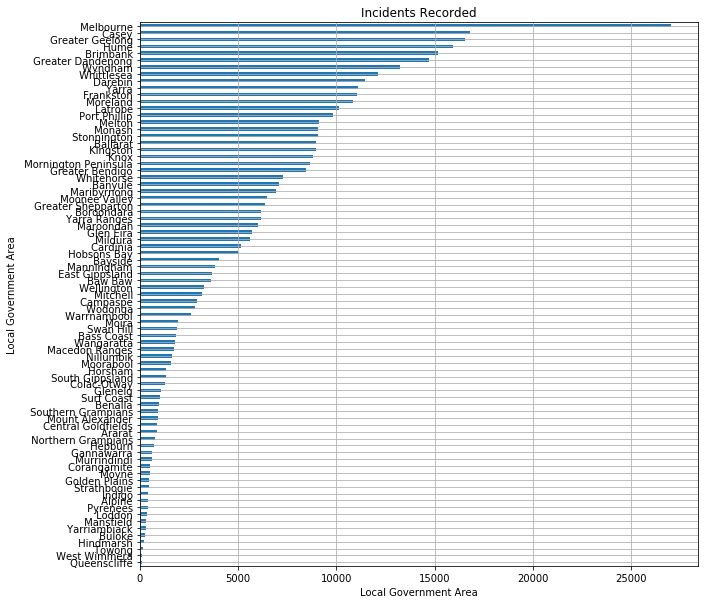

In [79]:
crime1.set_index('Local Government Area')['Incidents Recorded'].sort_values().plot(kind='barh', grid=True, figsize=(10,10))
plt.xlabel('Local Government Area')
plt.title('Incidents Recorded')
plt.show()

In [80]:

#Combine crime data and borough information data
df = pd.merge(crime1,area, how='outer', on='Local Government Area')
df.head()

,Local Government Area,Incidents Recorded,Population,Latitude,Longitude,Unnamed: 4
0,Banyule,7072.0,130237.0,-37.73,145.08,NaN
1,Brimbank,15178.0,208714.0,-37.76,144.81,NaN
2,Darebin,11442.0,161609.0,-37.73,145.02,NaN
3,Hobsons Bay,5002.0,96470.0,-37.84,144.84,NaN
4,Hume,15929.0,224394.0,-37.60,144.83,NaN


In [81]:
df['Population'].astype(float)
df['CrimeToPop'] = df['Incidents Recorded'] / df['Population'] * 1000
df.head()


,Local Government Area,Incidents Recorded,Population,Latitude,Longitude,Unnamed: 4,CrimeToPop
0,Banyule,7072.0,130237.0,-37.73,145.08,NaN,54.301005
1,Brimbank,15178.0,208714.0,-37.76,144.81,NaN,72.721523
2,Darebin,11442.0,161609.0,-37.73,145.02,NaN,70.800512
3,Hobsons Bay,5002.0,96470.0,-37.84,144.84,NaN,51.850316
4,Hume,15929.0,224394.0,-37.60,144.83,NaN,70.986747


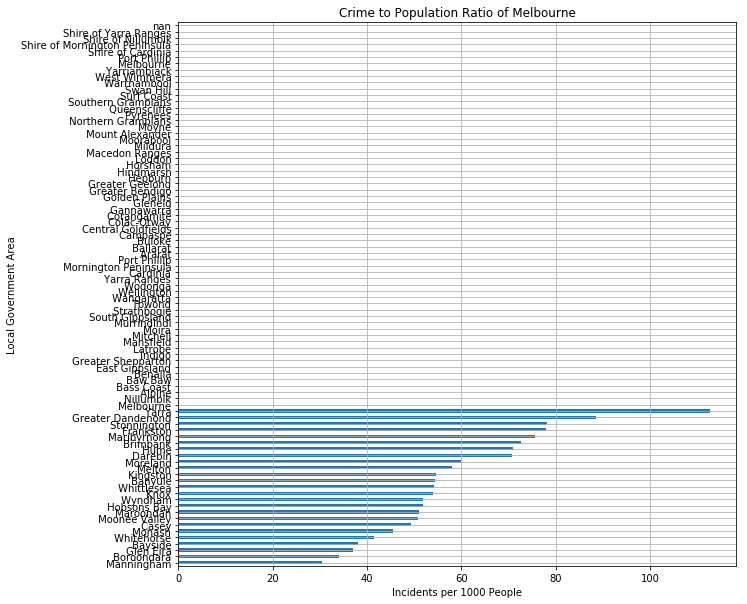

In [82]:
df.set_index('Local Government Area')['CrimeToPop'].sort_values().plot(kind='barh', grid=True, figsize=(10,10))
plt.xlabel('Incidents per 1000 People')
plt.title('Crime to Population Ratio of Melbourne')
plt.show()

In [83]:
!conda install -c conda-forge folium=0.5.0 --yes  
import folium
from geopy.geocoders import Nominatim

Solving environment: done

# All requested packages already installed.



In [87]:
address = 'Greater Melbourne, Australia'

geolocator = Nominatim(user_agent="explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Greater Melbourne are {}, {}.'.format(latitude, longitude))
map_melbourne = folium.Map(location=[latitude,longitude], zoom_start=11)
 

The geograpical coordinate of Greater Melbourne are -37.9504939, 145.36785627371626.


In [88]:


for lat, lng, LocalGovernmentArea in zip(df['Latitude'], df['Longitude'], df['Local Government Area']):
    label = '{}'.format(LocalGovernmentArea)
    label2 = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label2,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_melbourne)  
map_melbourne

ValueError: Location values cannot contain NaNs, got:
[nan, nan]

In [59]:
import numpy as np  
import pandas as pd  

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json  

from geopy.geocoders import Nominatim 
GeoLocator = Nominatim(user_agent='My-IBMNotebook') 
import requests 
from pandas.io.json import json_normalize 

 
import matplotlib.cm as cm
import matplotlib.colors as colors

 
from sklearn.cluster import KMeans



In [97]:
address = 'Greater Melbourne, Australia'

geolocator = Nominatim(user_agent="explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Greater Melbourne are {}, {}.'.format(latitude, longitude))



The geograpical coordinate of Greater Melbourne are -37.9504939, 145.36785627371626.


b. Cluster Analysis
In this part, we will conduct K-means clustering to group the boroughs according to what convenience facilities they have using Foursquare data.

In [32]:
print('There are {} uniques categories.'.format(len(venues['Venue Category'].unique())))

There are 100 uniques categories.


In [39]:
onehot = pd.get_dummies(venues[['Venue Category']], prefix="", prefix_sep="")

In [40]:
neighborhood = venues['Neighborhood']
onehot.insert(0, 'Neighborhood', neighborhood)
onehot.head()

,Neighborhood,African Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,BBQ Joint,Bakery,Bar,Bookstore,Bowling Alley,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Business Service,Café,Campground,Chinese Restaurant,City Hall,Coffee Shop,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Dive Bar,Dog Run,Donut Shop,Dry Cleaner,Dumpling Restaurant,Electronics Store,Farmers Market,Fast Food Restaurant,Fish Market,Food,Food Court,Food Truck,Fried Chicken Joint,Gas Station,Gastropub,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hobby Shop,Hotel,Ice Cream Shop,Indian Restaurant,Indonesian Restaurant,Italian Restaurant,Japanese Restaurant,Kids Store,Korean Restaurant,Library,Light Rail Station,Liquor Store,Malay Restaurant,Market,Martial Arts Dojo,Mexican Restaurant,Museum,Music Venue,Night Market,Noodle House,Paper / Office Supplies Store,Park,Pet Store,Pizza Place,Playground,Plaza,Portuguese Restaurant,Pub,Racetrack,Ramen Restaurant,Rental Car Location,Rock Climbing Spot,Sandwich Place,Scandinavian Restaurant,Shopping Mall,Soccer Field,Spanish Restaurant,Sporting Goods Shop,Sports Club,Supermarket,Sushi Restaurant,Tapas Restaurant,Tennis Court,Thai Restaurant,Theater,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Whisky Bar,Wine Bar
0,Melbourne,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Melbourne,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Melbourne,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Melbourne,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Melbourne,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [41]:
onehot.shape

(237, 101)

In [89]:
grouped = onehot.groupby('Neighborhood').mean().reset_index()
grouped

,Neighborhood,African Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,BBQ Joint,Bakery,Bar,Bookstore,Bowling Alley,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Business Service,Café,Campground,Chinese Restaurant,City Hall,Coffee Shop,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Dive Bar,Dog Run,Donut Shop,Dry Cleaner,Dumpling Restaurant,Electronics Store,Farmers Market,Fast Food Restaurant,Fish Market,Food,Food Court,Food Truck,Fried Chicken Joint,Gas Station,Gastropub,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hobby Shop,Hotel,Ice Cream Shop,Indian Restaurant,Indonesian Restaurant,Italian Restaurant,Japanese Restaurant,Kids Store,Korean Restaurant,Library,Light Rail Station,Liquor Store,Malay Restaurant,Market,Martial Arts Dojo,Mexican Restaurant,Museum,Music Venue,Night Market,Noodle House,Paper / Office Supplies Store,Park,Pet Store,Pizza Place,Playground,Plaza,Portuguese Restaurant,Pub,Racetrack,Ramen Restaurant,Rental Car Location,Rock Climbing Spot,Sandwich Place,Scandinavian Restaurant,Shopping Mall,Soccer Field,Spanish Restaurant,Sporting Goods Shop,Sports Club,Supermarket,Sushi Restaurant,Tapas Restaurant,Tennis Court,Thai Restaurant,Theater,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Whisky Bar,Wine Bar
0,Banyule,0.00,0.00,0.0,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.000000,0.0,1.000000,0.0,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.00,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.00,0.000000,0.0,0.00,0.00,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.0,0.00,0.00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.0,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.00
1,Bayside,0.00,0.00,0.0,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.00,0.00,0.166667,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.166667,0.00,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.00,0.000000,0.0,0.00,0.00,0.000000,0.166667,0.00,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.166667,0.00,0.00,0.00,0.000000,0.0,0.00,0.00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.0,0.00,0.166667,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.00,0.166667,0.000000,0.00,0.00
2,Boroondara,0.00,0.00,0.0,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.000000,0.0,0.200000,0.0,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.00,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.00,0.000000,0.0,0.00,0.00,0.000000,0.200000,0.00,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.200000,0.000000,0.00,0.00,0.00,0.000000,0.0,0.00,0.00,0.000000,0.0,0.200000,0.000000,0.200000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.0,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.00
3,Brimbank,0.00,0.00,0.0,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.00,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.00,0.000000,0.0,0.00,0.00,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.0,0.00,0.00,0.000

In [43]:
num_top_venues = 5

for hood in grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = grouped[grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

---- Banyule----
                venue  freq
0                Café   1.0
1  African Restaurant   0.0
2              Museum   0.0
3               Plaza   0.0
4          Playground   0.0


---- Bayside----
               venue  freq
0            Dog Run  0.17
1        Video Store  0.17
2                Gym  0.17
3  Convenience Store  0.17
4       Liquor Store  0.17


---- Boroondara----
                venue  freq
0         Pizza Place   0.2
1                 Gym   0.2
2                Park   0.2
3  Light Rail Station   0.2
4                Café   0.2


---- Brimbank----
                venue  freq
0       Train Station   1.0
1  African Restaurant   0.0
2   Martial Arts Dojo   0.0
3          Playground   0.0
4         Pizza Place   0.0


---- Casey----
                venue  freq
0             Theater   1.0
1  African Restaurant   0.0
2   Martial Arts Dojo   0.0
3          Playground   0.0
4         Pizza Place   0.0


---- Darebin----
                venue  freq
0  Light Rail Station  0

In [85]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
venues_sorted = pd.DataFrame(columns=columns)
venues_sorted['Neighborhood'] = grouped['Neighborhood']

for ind in np.arange(grouped.shape[0]):
    venues_sorted.iloc[ind, 1:] = return_most_common_venues(grouped.iloc[ind, :], num_top_venues)
 
venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Banyule,Café,Wine Bar,Fast Food Restaurant,Dessert Shop,Dim Sum Restaurant,Dive Bar,Dog Run,Donut Shop,Dry Cleaner,Dumpling Restaurant
1,Bayside,Convenience Store,Sandwich Place,Liquor Store,Dog Run,Gym,Video Store,Asian Restaurant,Fast Food Restaurant,Dessert Shop,Dim Sum Restaurant
2,Boroondara,Gym,Pizza Place,Park,Café,Light Rail Station,Electronics Store,Dessert Shop,Dim Sum Restaurant,Dive Bar,Dog Run
3,Brimbank,Train Station,Wine Bar,Fast Food Restaurant,Department Store,Dessert Shop,Dim Sum Restaurant,Dive Bar,Dog Run,Donut Shop,Dry Cleaner
4,Casey,Theater,Wine Bar,Fast Food Restaurant,Department Store,Dessert Shop,Dim Sum Restaurant,Dive Bar,Dog Run,Donut Shop,Dry Cleaner


In [45]:
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors

In [94]:
kclusters = 5
london_cluster = grouped.drop('Neighborhood', 1)
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(london_cluster)

kmeans.labels_[0:10]
venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [95]:
 
melbourne_merged = df
melbourne_merged = melbourne_merged.join(venues_sorted.set_index('Neighborhood'), on='Local Government Area')

melbourne_merged.head()



,Local Government Area,Incidents Recorded,Population,Latitude,Longitude,Unnamed: 4,CrimeToPop,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Banyule,7072.0,130237.0,-37.73,145.08,NaN,54.301005,0.0,Café,Wine Bar,Fast Food Restaurant,Dessert Shop,Dim Sum Restaurant,Dive Bar,Dog Run,Donut Shop,Dry Cleaner,Dumpling Restaurant
1,Brimbank,15178.0,208714.0,-37.76,144.81,NaN,72.721523,2.0,Train Station,Wine Bar,Fast Food Restaurant,Department Store,Dessert Shop,Dim Sum Restaurant,Dive Bar,Dog Run,Donut Shop,Dry Cleaner
2,Darebin,11442.0,161609.0,-37.73,145.02,NaN,70.800512,1.0,Light Rail Station,Café,Wine Bar,Fast Food Restaurant,Dessert Shop,Dim Sum Restaurant,Dive Bar,Dog Run,Donut Shop,Dry Cleaner
3,Hobsons Bay,5002.0,96470.0,-37.84,144.84,NaN,51.850316,1.0,Business Service,Wine Bar,Fast Food Restaurant,Dessert Shop,Dim Sum Restaurant,Dive Bar,Dog Run,Donut Shop,Dry Cleaner,Dumpling Restaurant
4,Hume,15929.0,224394.0,-37.60,144.83,NaN,70.986747,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [97]:
 map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(melbourne_merged['Latitude'], melbourne_merged['Longitude'], melbourne_merged['Local Government Area'], melbourne_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

TypeError: list indices must be integers or slices, not float

In [98]:
melbourne_merged.loc[melbourne_merged['Cluster Labels'] == 0, melbourne_merged.columns[[0] + list(range(5, melbourne_merged.shape[1]))]]

,Local Government Area,Unnamed: 4,CrimeToPop,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Banyule,NaN,54.301005,0.0,Café,Wine Bar,Fast Food Restaurant,Dessert Shop,Dim Sum Restaurant,Dive Bar,Dog Run,Donut Shop,Dry Cleaner,Dumpling Restaurant
44,Greater Dandenong,NaN,88.564307,0.0,Gas Station,Café,Wine Bar,Fast Food Restaurant,Dessert Shop,Dim Sum Restaurant,Dive Bar,Dog Run,Donut Shop,Dry Cleaner
83,Shire of Nillumbik,NaN,NaN,0.0,Café,Wine Bar,Fast Food Restaurant,Dessert Shop,Dim Sum Restaurant,Dive Bar,Dog Run,Donut Shop,Dry Cleaner,Dumpling Restaurant


In [99]:
melbourne_merged.loc[melbourne_merged['Cluster Labels'] == 1, melbourne_merged.columns[[0] + list(range(5, melbourne_merged.shape[1]))]]

,Local Government Area,Unnamed: 4,CrimeToPop,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Darebin,NaN,70.800512,1.0,Light Rail Station,Café,Wine Bar,Fast Food Restaurant,Dessert Shop,Dim Sum Restaurant,Dive Bar,Dog Run,Donut Shop,Dry Cleaner
3,Hobsons Bay,NaN,51.850316,1.0,Business Service,Wine Bar,Fast Food Restaurant,Dessert Shop,Dim Sum Restaurant,Dive Bar,Dog Run,Donut Shop,Dry Cleaner,Dumpling Restaurant
5,Maribyrnong,NaN,75.689102,1.0,Arts & Crafts Store,Paper / Office Supplies Store,Italian Restaurant,Bowling Alley,Light Rail Station,Wine Bar,Fast Food Restaurant,Dim Sum Restaurant,Dive Bar,Dog Run
7,Melton,NaN,58.087076,1.0,Pizza Place,Cosmetics Shop,Café,Fried Chicken Joint,Liquor Store,Mexican Restaurant,Convenience Store,Pub,Sandwich Place,Grocery Store
8,Moonee Valley,NaN,50.757333,1.0,Gym,Café,Sandwich Place,Light Rail Station,Breakfast Spot,Food,Bakery,Indian Restaurant,Park,Farmers Market
9,Moreland,NaN,59.832164,1.0,Whisky Bar,Construction & Landscaping,Shopping Mall,Supermarket,Farmers Market,Department Store,Dessert Shop,Dim Sum Restaurant,Dive Bar,Dog Run
13,Yarra,NaN,112.635885,1.0,Coffee Shop,Café,Brewery,African Restaurant,Burger Joint,Gastropub,Indian Restaurant,Japanese Restaurant,Dive Bar,Music Venue
18,Boroondara,NaN,34.122313,1.0,Gym,Pizza Place,Park,Café,Light Rail Station,Electronics Store,Dessert Shop,Dim Sum Restaurant,Dive Bar,Dog Run
22,Knox,NaN,53.951214,1.0,Martial Arts Dojo,Gym,Athletics & Sports,Bowling Alley,Wine Bar,Dessert Shop,Dim Sum Restaurant,Dive Bar,Dog Run,Donut Shop
26,Maroondah,NaN,51.115764,1.0,Playground,Tennis Court,Farmers Market,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Dive Bar,Dog Run,Donut Shop


In [100]:
melbourne_merged.loc[melbourne_merged['Cluster Labels'] ==2, melbourne_merged.columns[[0] + list(range(5, melbourne_merged.shape[1]))]]

,Local Government Area,Unnamed: 4,CrimeToPop,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Brimbank,NaN,72.721523,2.0,Train Station,Wine Bar,Fast Food Restaurant,Department Store,Dessert Shop,Dim Sum Restaurant,Dive Bar,Dog Run,Donut Shop,Dry Cleaner


In [101]:
melbourne_merged.loc[melbourne_merged['Cluster Labels'] == 3, melbourne_merged.columns[[0] + list(range(5, melbourne_merged.shape[1]))]]

,Local Government Area,Unnamed: 4,CrimeToPop,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
12,Wyndham,NaN,51.860004,3.0,Museum,Wine Bar,Farmers Market,Department Store,Dessert Shop,Dim Sum Restaurant,Dive Bar,Dog Run,Donut Shop,Dry Cleaner


In [102]:
melbourne_merged.loc[melbourne_merged['Cluster Labels'] == 4, melbourne_merged.columns[[0] + list(range(5, melbourne_merged.shape[1]))]]

,Local Government Area,Unnamed: 4,CrimeToPop,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
41,Casey,NaN,49.38326,4.0,Theater,Wine Bar,Fast Food Restaurant,Department Store,Dessert Shop,Dim Sum Restaurant,Dive Bar,Dog Run,Donut Shop,Dry Cleaner


4. Results & Recommendation
Now we will review all the analysis made in this project before we make a conclusion on which area to live as an international student or invest as a student accommodation builder.

Like mentioned in the beginning, our key criteria of location decision will be based on safety and atmosphere.

In [103]:
crimetopop = melbourne_merged['CrimeToPop']
melbourne_merged.drop(['CrimeToPop'], inplace=True, axis=1)
melbourne_merged.insert(1, 'CrimeToPop', crimetopop)
melbourne_merged.sort_values(by='CrimeToPop', ascending = False)

,Local Government Area,CrimeToPop,Incidents Recorded,Population,Latitude,Longitude,Unnamed: 4,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
13,Yarra,112.635885,11097.0,98521.0,-37.80,144.99,NaN,1.0,Coffee Shop,Café,Brewery,African Restaurant,Burger Joint,Gastropub,Indian Restaurant,Japanese Restaurant,Dive Bar,Music Venue
44,Greater Dandenong,88.564307,14710.0,166094.0,-38.01,145.20,NaN,0.0,Gas Station,Café,Wine Bar,Fast Food Restaurant,Dessert Shop,Dim Sum Restaurant,Dive Bar,Dog Run,Donut Shop,Dry Cleaner
48,Stonnington,78.110613,9077.0,116207.0,-37.86,145.03,NaN,1.0,Café,Japanese Restaurant,Italian Restaurant,Gym,Burger Joint,Supermarket,Noodle House,Convenience Store,Liquor Store,City Hall
42,Frankston,77.930135,11054.0,141845.0,-38.15,145.14,NaN,1.0,Electronics Store,Department Store,Café,Kids Store,Sandwich Place,Sporting Goods Shop,Sports Club,Pet Store,Train Station,Convenience Store
5,Maribyrnong,75.689102,6917.0,91387.0,-37.77,144.88,NaN,1.0,Arts & Crafts Store,Paper / Office Supplies Store,Italian Restaurant,Bowling Alley,Light Rail Station,Wine Bar,Fast Food Restaurant,Dim Sum Restaurant,Dive Bar,Dog Run
1,Brimbank,72.721523,15178.0,208714.0,-37.76,144.81,NaN,2.0,Train Station,Wine Bar,Fast Food Restaurant,Department Store,Dessert Shop,Dim Sum Restaurant,Dive Bar,Dog Run,Donut Shop,Dry Cleaner
4,Hume,70.986747,15929.0,224394.0,-37.60,144.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Darebin,70.800512,11442.0,161609.0,-37.73,145.02,NaN,1.0,Light Rail Station,Café,Wine Bar,Fast Food Restaurant,Dessert Shop,Dim Sum Restaurant,Dive Bar,Dog Run,Donut Shop,Dry Cleaner
9,Moreland,59.832164,10873.0,181725.0,-37.72,144.95,NaN,1.0,Whisky Bar,Construction & Landscaping,Shopping Mall,Supermarket,Farmers Market,Department Store,Dessert Shop,Dim Sum Restaurant,Dive Bar,Dog Run
7,Melton,58.087076,9103.0,156713.0,-37.68,144.58,NaN,1.0,Pizza Place,Cosmetics Shop,Café,Fried Chicken Joint,Liquor Store,Mexican Restaurant,Convenience Store,Pub,Sandwich Place,Grocery Store


In [108]:
score = melbourne_merged[['Local Government Area','CrimeToPop','Cluster Labels']].copy()
score.head(10)


,Local Government Area,CrimeToPop,Cluster Labels
0,Banyule,54.301005,0.0
1,Brimbank,72.721523,2.0
2,Darebin,70.800512,1.0
3,Hobsons Bay,51.850316,1.0
4,Hume,70.986747,NaN
5,Maribyrnong,75.689102,1.0
6,Melbourne,NaN,NaN
7,Melton,58.087076,1.0
8,Moonee Valley,50.757333,1.0
9,Moreland,59.832164,1.0


In [110]:
score['Safety'] = (score['CrimeToPop']-score['CrimeToPop'].min())/(score['CrimeToPop'].max()-score['CrimeToPop'].min())
score['Safety'] = (score['Safety'] - 1) * -1
score.head(10)

,Local Government Area,CrimeToPop,Cluster Labels,Safety
0,Banyule,54.301005,0.0,0.710293
1,Brimbank,72.721523,2.0,0.486003
2,Darebin,70.800512,1.0,0.509393
3,Hobsons Bay,51.850316,1.0,0.740133
4,Hume,70.986747,NaN,0.507126
5,Maribyrnong,75.689102,1.0,0.449869
6,Melbourne,NaN,NaN,NaN
7,Melton,58.087076,1.0,0.664194
8,Moonee Valley,50.757333,1.0,0.753442
9,Moreland,59.832164,1.0,0.642945


In [111]:
score['Atmosphere'] = 0
score.head()

,Local Government Area,CrimeToPop,Cluster Labels,Safety,Atmosphere
0,Banyule,54.301005,0.0,0.710293,0
1,Brimbank,72.721523,2.0,0.486003,0
2,Darebin,70.800512,1.0,0.509393,0
3,Hobsons Bay,51.850316,1.0,0.740133,0
4,Hume,70.986747,NaN,0.507126,0


In [112]:

for i in range(32):
    if score.iloc[i,2] == 2:
        score.iloc[i,4] = 1
    elif score.iloc[i,2] == 1:
        score.iloc[i,4] = 0.9
    elif score.iloc[i,2] == 0:
        score.iloc[i,2] = 0.8
    elif score.iloc[i,2] == 3:
        score.iloc[i,4] = 0.7
    else:
        score.iloc[i,2] = 0.6
                
score.head()

,Local Government Area,CrimeToPop,Cluster Labels,Safety,Atmosphere
0,Banyule,54.301005,0.8,0.710293,0.0
1,Brimbank,72.721523,2.0,0.486003,1.0
2,Darebin,70.800512,1.0,0.509393,0.9
3,Hobsons Bay,51.850316,1.0,0.740133,0.9
4,Hume,70.986747,0.6,0.507126,0.0


In [113]:
score.drop(['CrimeToPop'], inplace=True, axis=1)
score.drop(['Cluster Labels'], inplace=True, axis=1)
score['Score'] = score['Safety'] + score['Atmosphere']
score.sort_values(by='Score', ascending = False)

,Local Government Area,Safety,Atmosphere,Score
18,Boroondara,0.955992,0.9,1.855992
29,Monash,0.818521,0.9,1.718521
8,Moonee Valley,0.753442,0.9,1.653442
26,Maroondah,0.749077,0.9,1.649077
3,Hobsons Bay,0.740133,0.9,1.640133
22,Knox,0.714552,0.9,1.614552
7,Melton,0.664194,0.9,1.564194
9,Moreland,0.642945,0.9,1.542945
1,Brimbank,0.486003,1.0,1.486003
12,Wyndham,0.740015,0.7,1.440015



5. Conclusion
From our analysis, we have found that the five boroughs below are the best places to build a student hall, based on safety and atmosphere of the neighborhood. The top five areas belong to the Busy Area cluster, with many coffee shops and clothing stores. Therefore, what differentiates them is the safety score, which was calculated from monthly recorded crimes per 1000 people.

In [115]:
df_top5 = df.iloc[[18,29,8,26,3],:]
df_top5

,Local Government Area,Incidents Recorded,Population,Latitude,Longitude,Unnamed: 4,CrimeToPop
18,Boroondara,6186.0,181289.0,-37.81,145.07,NaN,34.122313
29,Monash,9086.0,200077.0,-37.90,145.12,NaN,45.412516
8,Moonee Valley,6491.0,127883.0,-37.75,144.91,NaN,50.757333
26,Maroondah,6006.0,117498.0,-37.81,145.26,NaN,51.115764
3,Hobsons Bay,5002.0,96470.0,-37.84,144.84,NaN,51.850316


In [116]:
map = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough in zip(df_top5['Latitude'], df_top5['Longitude'], df_top5['Local Government Area']):
    label = '{}'.format(borough)
    label2 = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label2,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map)  
    
map